In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# pd.set_option('display.max_columns', None)  # Mostra todas as colunas
# pd.set_option('display.max_rows', None)     # Mostra todas as linhas
# pd.set_option('display.width', 1000)        # Aumenta a largura da exibição
# pd.set_option('display.max_colwidth', 100)  # Aumenta a largura máxima de cada coluna

In [2]:
# df_bert_descricao = pd.read_csv("infos_bert/results_bert_round1.csv", encoding='utf-8')
# Carregar o dataset
df_bert = pd.read_csv("infos_bert/results_bert_round1.csv", encoding='utf-8')

# Aplicar ast.literal_eval nas colunas relevantes
cols_to_eval = [f'top{num}_descricao' for num in range(3, 11)] + [f'top{num}_json' for num in range(3, 11)] + ['Tags']
df_bert[cols_to_eval] = df_bert[cols_to_eval].applymap(ast.literal_eval)

# Imprimir o tamanho do dataframe antes de filtrar
print(len(df_bert))

# Filtrar o dataframe para remover linhas com 'Tags' vazias
df_bert = df_bert[df_bert['Tags'].apply(bool)]

# Imprimir o tamanho do dataframe após filtrar
print(len(df_bert))

1014
187


In [3]:
# Carregar o dataset
df_scibert = pd.read_csv("infos_scibert/results_scibert_round1.csv", encoding='utf-8')

# Aplicar ast.literal_eval nas colunas relevantes
cols_to_eval = [f'top{num}_descricao' for num in range(3, 11)] + [f'top{num}_json' for num in range(3, 11)] + ['Tags']
df_scibert[cols_to_eval] = df_scibert[cols_to_eval].applymap(ast.literal_eval)

# Imprimir o tamanho do dataframe antes de filtrar
print(len(df_scibert))

# Filtrar o dataframe para remover linhas com 'Tags' vazias
df_scibert = df_scibert[df_scibert['Tags'].apply(bool)]

# Imprimir o tamanho do dataframe após filtrar
print(len(df_scibert))

1014
187


In [4]:
#Pegar todas as colunas do top x do topico bert

import pandas as pd
import glob

# Pasta onde estão os arquivos CSV
folder_path = 'topicos/bert/'

# Obter a lista de arquivos CSV na pasta
csv_files = glob.glob(f'{folder_path}results_topicos_top*bert.csv')

# Lista para armazenar DataFrames
dfs = []

# Carregar cada arquivo CSV e adicionar à lista de DataFrames
for file in csv_files:
    df = pd.read_csv(file, index_col=0)
    dfs.append(df)

# Fazer o merge de todos os DataFrames usando o índice como referência
df_bert_topicos = dfs[0]
for df in dfs[1:]:
    for column in df.columns:
        if column not in df_bert_topicos.columns:
            df_bert_topicos = df_bert_topicos.join(df[column], how='outer')

# Exibir o DataFrame resultante

for column in df_bert_topicos.columns:
    def safe_literal_eval(val):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return val

    df_bert_topicos[column] = df_bert_topicos[column].apply(lambda x: safe_literal_eval(x) if isinstance(x, str) else x)

# Exibir o DataFrame resultante
df_bert_topicos = df_bert_topicos[df_bert_topicos['Tags'].apply(lambda x: x != [])]

In [5]:
#Pegar todas as colunas do top x do topico scibert

import pandas as pd
import glob

# Pasta onde estão os arquivos CSV
folder_path = 'topicos/scibert/'

# Obter a lista de arquivos CSV na pasta
csv_files = glob.glob(f'{folder_path}results_topicos_top*scibert.csv')

# Lista para armazenar DataFrames
dfs = []

# Carregar cada arquivo CSV e adicionar à lista de DataFrames
for file in csv_files:
    df = pd.read_csv(file, index_col=0)
    dfs.append(df)

# Fazer o merge de todos os DataFrames usando o índice como referência
df_scibert_topicos = dfs[0]
for df in dfs[1:]:
    for column in df.columns:
        if column not in df_scibert_topicos.columns:
            df_scibert_topicos = df_scibert_topicos.join(df[column], how='outer')

# Exibir o DataFrame resultante

for column in df_scibert_topicos.columns:
    def safe_literal_eval(val):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return val

    df_scibert_topicos[column] = df_scibert_topicos[column].apply(lambda x: safe_literal_eval(x) if isinstance(x, str) else x)

# Exibir o DataFrame resultante
df_scibert_topicos = df_scibert_topicos[df_scibert_topicos['Tags'].apply(lambda x: x != [])]

In [6]:
# def mapear_temas_para_workflows_df(df):
#     # Inicializa um dicionário para armazenar os temas e os números de linhas onde eles ocorrem
#     temas_workflows = {}

#     # Loop sobre as linhas do DataFrame
#     for idx, lista_temas in enumerate(df['Tags']):
#         # Loop sobre cada tema na lista de temas da linha
#         for tema in lista_temas:
#             # Se o tema já existe no dicionário, adiciona o número da linha
#             if tema in temas_workflows:
#                 temas_workflows[tema].append(idx)
#             # Se não, cria uma nova entrada no dicionário
#             else:
#                 temas_workflows[tema] = [idx]

#     # Cria um DataFrame a partir do dicionário
#     df_temas_workflows = pd.DataFrame(list(temas_workflows.items()), columns=['Tag', 'Workflows'])

#     return df_temas_workflows

# # Exemplo de uso
# df_resultante = mapear_temas_para_workflows_df(df_bert)
# # df_bert_descricao = df_bert_descricao[df_bert_descricao['Tags'].apply(lambda x: x != [])]

# # Exibir o DataFrame resultante
# print(df_resultante)


                 Tag                                       Workflows
0            variant                                   [0, 116, 183]
1               snps                                             [0]
2              human                                         [0, 74]
3             RNAseq  [1, 17, 19, 20, 41, 54, 56, 82, 117, 133, 164]
4            CUTnRUN                                      [2, 8, 10]
..               ...                                             ...
228         datasets                                           [180]
229             Easy                                           [181]
230  variant-calling                                           [182]
231          calling                                           [183]
232            Mouse                                           [185]

[233 rows x 2 columns]


In [10]:

def verificar_acerto(tags, descricoes_tags):
    for tag in tags:
        for descricoes in ast.literal_eval(descricoes_tags):
            if tag in descricoes:
                return 1
    return 0

#Descrição e json
def adicionar_coluna_acertou(df):
    df['Acertou_descricao_top3'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top3_tags_descricao']), axis=1)
    df['Acertou_descricao_top4'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top4_tags_descricao']), axis=1)
    df['Acertou_descricao_top5'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top5_tags_descricao']), axis=1)
    df['Acertou_descricao_top6'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top6_tags_descricao']), axis=1)
    df['Acertou_descricao_top7'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top7_tags_descricao']), axis=1)
    df['Acertou_descricao_top8'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top8_tags_descricao']), axis=1)
    df['Acertou_descricao_top9'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top9_tags_descricao']), axis=1)
    df['Acertou_descricao_top10'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top10_tags_descricao']), axis=1)


    df['Acertou_json_top3'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top3_tags_json']), axis=1)
    df['Acertou_json_top4'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top4_tags_json']), axis=1)
    df['Acertou_json_top5'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top5_tags_json']), axis=1)
    df['Acertou_json_top6'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top6_tags_json']), axis=1)
    df['Acertou_json_top7'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top7_tags_json']), axis=1)
    df['Acertou_json_top8'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top8_tags_json']), axis=1)
    df['Acertou_json_top9'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top9_tags_json']), axis=1)
    df['Acertou_json_top10']= df.apply(lambda row: verificar_acerto(row['Tags'], row['top10_tags_json']), axis=1)
    return df



df_bert = adicionar_coluna_acertou(df_bert)
df_scibert = adicionar_coluna_acertou(df_scibert)

#Topicos

def verificar_acerto(tags, descricoes_tags):
    for tag in tags:
        for descricoes in descricoes_tags:
            if tag in descricoes:
                return 1
    return 0

def adicionar_coluna_acertou_topicos(df):
    df['Acertou_descricao_top3'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top3_tags_descricao']), axis=1)
    df['Acertou_descricao_top4'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top4_tags_descricao']), axis=1)
    df['Acertou_descricao_top5'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top5_tags_descricao']), axis=1)
    df['Acertou_descricao_top6'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top6_tags_descricao']), axis=1)
    df['Acertou_descricao_top7'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top7_tags_descricao']), axis=1)
    df['Acertou_descricao_top8'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top8_tags_descricao']), axis=1)
    df['Acertou_descricao_top9'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top9_tags_descricao']), axis=1)
    df['Acertou_descricao_top10'] = df.apply(lambda row: verificar_acerto(row['Tags'], row['top10_tags_descricao']), axis=1)

    return df

df_bert_topicos = adicionar_coluna_acertou_topicos(df_bert_topicos)
df_scibert_topicos = adicionar_coluna_acertou_topicos(df_scibert_topicos)

In [26]:
def acertou(acc1, acc2, acc3, acc4, acc5, acc6):
    count = 0
    for a, b, c, d, e, f in zip(acc1, acc2, acc3, acc4, acc5, acc6):
        if a == 1 or b == 1 or c == 1 or d == 1 or e ==1 or f==1:
            count += 1
    return count

# Exemplo de uso

for i in range(3,11):
    resultado = acertou(df_bert_topicos[f"Acertou_descricao_top{i}"],
                        df_scibert_topicos[f"Acertou_descricao_top{i}"],
                        df_bert[f"Acertou_json_top{i}"], 
                        df_bert[f"Acertou_descricao_top{i}"],
                        df_scibert[f"Acertou_json_top{i}"], 
                        df_scibert[f"Acertou_descricao_top{i}"])
    print(i,resultado)

# for i in range(3,11):
#     resultado = acertou(df_scibert_topicos[f"Acertou_descricao_top{i}"],
#                         df_scibert[f"Acertou_json_top{i}"],
#                         df_scibert[f"Acertou_json_top{i}"], 
#                         df_scibert[f"Acertou_json_top{i}"],
#                         df_scibert[f"Acertou_json_top{i}"], 
#                         df_scibert[f"Acertou_descricao_top{i}"])
#     print(i,resultado)


3 119
4 121
5 124
6 122
7 124
8 122
9 126
10 125


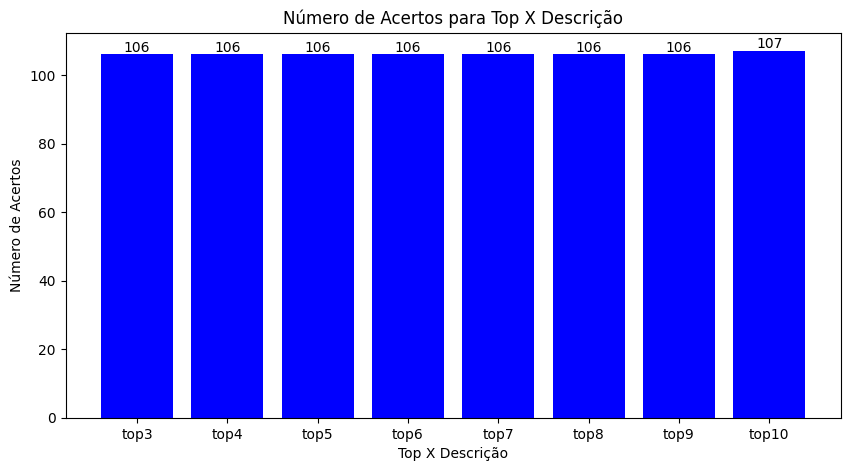

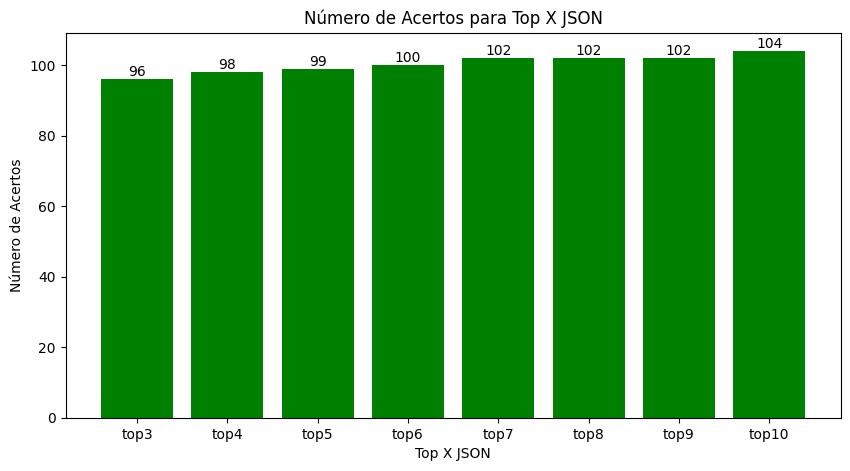

In [13]:
# Contar acertos para descrição e JSON
acertos_descricao = {f'top{i}': df_bert[f'Acertou_descricao_top{i}'].sum() for i in range(3, 11)}
acertos_json = {f'top{i}': df_bert[f'Acertou_json_top{i}'].sum() for i in range(3, 11)}

plt.figure(figsize=(10, 5))
bars = plt.bar(acertos_descricao.keys(), acertos_descricao.values(), color='blue')
plt.xlabel('Top X Descrição')
plt.ylabel('Número de Acertos')
plt.title('Número de Acertos para Top X Descrição')

# Adicionar os números em cima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.show()

plt.figure(figsize=(10, 5))
bars = plt.bar(acertos_json.keys(), acertos_json.values(), color='green')
plt.xlabel('Top X JSON')
plt.ylabel('Número de Acertos')
plt.title('Número de Acertos para Top X JSON')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.show()
